In [2]:
# Считываем данные о водителях
# id - id
# mean_dist_day - Среднее расстояние, пройденное водителем в день
# mean_over_speed_perc - Средний процент времени, в течение которого водитель превышал установленную скорость > 5 миль в час.
import pandas as pd
from sklearn.cluster import KMeans
data = pd.read_csv("driver-data.csv", index_col="id")
print(list(data))
data.head()

['mean_dist_day', 'mean_over_speed_perc']


,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


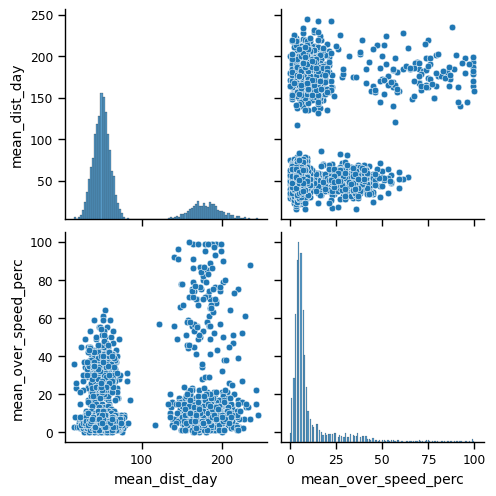

In [3]:
# Диаграммы рассеивания
import seaborn as sns
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(data, diag_kind = 'auto')
pass

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
data_np = data.values
data_np

array([[ 71.24,  28.  ,   4.  ,   0.  ],
       [ 52.53,  25.  ,   4.  ,   0.  ],
       [ 64.54,  27.  ,   4.  ,   0.  ],
       ...,
       [170.91,  12.  ,   5.  ,   1.  ],
       [176.14,   5.  ,   5.  ,   1.  ],
       [168.03,   9.  ,   5.  ,   1.  ]])

Text(0, 0.5, 'inertia')

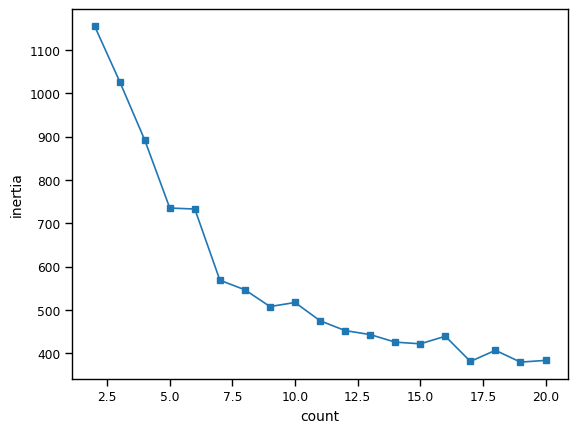

In [16]:
# Используем метод локтя
inertia = []
for k in range(2, 21):
    kmeans = sklearn.cluster.k_means(X=data_np, n_clusters=k, init='random') # -> (centroid, label, inertia)
    inertia.append(np.sqrt(kmeans[2]))

plt.plot(range(2, 21), inertia, marker='s')
plt.xlabel('count')
plt.ylabel('inertia')


Количество кластеров равно 6

In [6]:
kmeans = KMeans(n_clusters=6)

In [7]:

kmeans.fit(data)
kmeans.cluster_centers_

array([[ 41.61089312,   5.40043924],
       [196.73854545,  11.21515152],
       [ 57.94159329,   5.27672956],
       [176.63676768,  71.53535354],
       [ 50.61421836,  33.06203474],
       [166.04555256,  10.37466307]])

In [8]:
kmeans.labels_

array([4, 4, 4, ..., 5, 5, 5])

In [9]:
data["cluster"] = kmeans.labels_

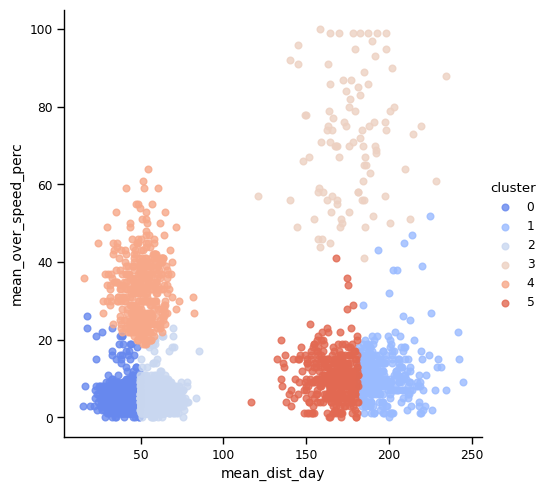

In [10]:
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', ci=6, aspect=1, fit_reg=False)

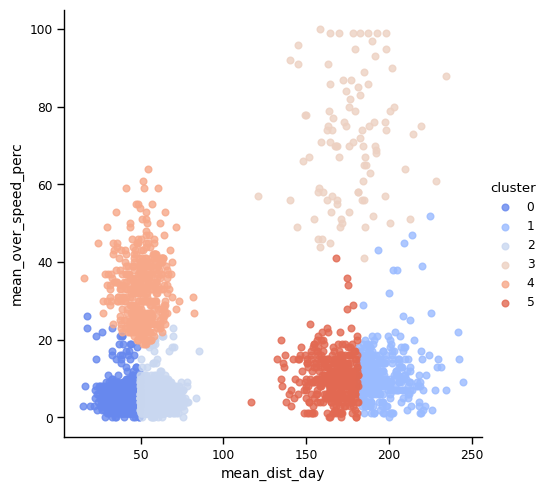

In [12]:
kmeans = KMeans(n_clusters=6, init="random")
kmeans.fit(data)
data["claster"] = kmeans.labels_
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', ci=6, aspect=1, fit_reg=False)